In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from tensorflow import feature_column
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('Proj1_Data.csv' , index_col=0)
data

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1


In [3]:
data.isna().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [4]:
data['Geography'] = data['Geography'].map(dict(zip(['France','Germany', 'Spain'],[0,1,2])))
data['Gender'] = data['Gender'].map(dict(zip(['Male','Female'],[0,1])))
y = pd.DataFrame(data['Exited'])
data_dropped = data.drop(['CustomerId', 'Surname', 'Exited'], axis=1) #axis=1 because we want to remove columns

In [5]:
data_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  int64  
 2   Gender           10000 non-null  int64  
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
dtypes: float64(2), int64(8)
memory usage: 859.4 KB


In [6]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() 
data_scaled = scaler.fit_transform(data_dropped)
data_scaled = pd.DataFrame(data_scaled, columns=data_dropped.columns.tolist())
data_scaled.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,0.538,0.0,1.0,0.324324,0.2,0.000000,0.000000,1.0,1.0,0.506735
1,0.516,1.0,1.0,0.310811,0.1,0.334031,0.000000,0.0,1.0,0.562709
2,0.304,0.0,1.0,0.324324,0.8,0.636357,0.666667,1.0,0.0,0.569654
3,0.698,0.0,1.0,0.283784,0.1,0.000000,0.333333,0.0,0.0,0.469120
4,1.000,1.0,1.0,0.337838,0.2,0.500246,0.000000,1.0,1.0,0.395400


In [7]:
X_train, X_test, y_train, y_test = train_test_split(data_dropped, y, test_size = 0.2, random_state = 56)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

#train, test = train_test_split(data_dropped, test_size=0.2)
#train, val = train_test_split(train, test_size=0.2)
#print(len(train), 'train examples')
#print(len(val), 'validation examples')
#print(len(test), 'test examples')

(8000, 10)
(2000, 10)
(8000, 1)
(2000, 1)


In [8]:
y_test[:9]

,Exited
RowNumber,
4942,1
5928,1
8948,0
483,0
8269,0
3530,0
3470,0
6633,0
6900,1


In [9]:
from tensorflow.keras.layers import Dense , Dropout ,Input , Average
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Model
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

In [93]:

sgd = SGD(lr=0.001 , momentum=0.87)
es = EarlyStopping(monitor='val_loss', mode='auto', verbose=1 , patience=3)
input_layer = Input(shape=X_train.shape[1], name ="input")
hidden_layer1 = Dense(128 ,activation='relu' , name="layer1")(input_layer)
dropout_layer = Dropout(0.2)(hidden_layer1)
hidden_layer2 = Dense(16 ,activation='sigmoid' , name="layer2")(dropout_layer)
output_layer = Dense(2 ,activation='softmax' , name="layer3")(hidden_layer2)
network = Model(inputs=input_layer, outputs=output_layer , name = "network1")
adam= tf.keras.optimizers.Adam(learning_rate=0.001)
network.compile(optimizer=sgd , loss='binary_crossentropy', metrics=['accuracy'])
history = network.fit(X_train,y_train , batch_size=64 , epochs=50 , validation_split=0.25 , callbacks = [es])


Epoch 1/50
94/94 [==============================] - 1s 7ms/step - loss: 0.7887 - accuracy: 0.5322 - val_loss: 0.7383 - val_accuracy: 0.2715
Epoch 2/50
94/94 [==============================] - 0s 2ms/step - loss: 0.7204 - accuracy: 0.3970 - val_loss: 0.7009 - val_accuracy: 0.4425
Epoch 3/50
94/94 [==============================] - 0s 3ms/step - loss: 0.7048 - accuracy: 0.5672 - val_loss: 0.6971 - val_accuracy: 0.6820
Epoch 4/50
94/94 [==============================] - 0s 3ms/step - loss: 0.6985 - accuracy: 0.5588 - val_loss: 0.6947 - val_accuracy: 0.7630
Epoch 5/50
94/94 [==============================] - 0s 3ms/step - loss: 0.6967 - accuracy: 0.5923 - val_loss: 0.6944 - val_accuracy: 0.7640
Epoch 6/50
94/94 [==============================] - 0s 3ms/step - loss: 0.6963 - accuracy: 0.6360 - val_loss: 0.6943 - val_accuracy: 0.7670
Epoch 7/50
94/94 [==============================] - 0s 2ms/step - loss: 0.6958 - accuracy: 0.6627 - val_loss: 0.6940 - val_accuracy: 0.7660
Epoch 8/50
94/94 [==

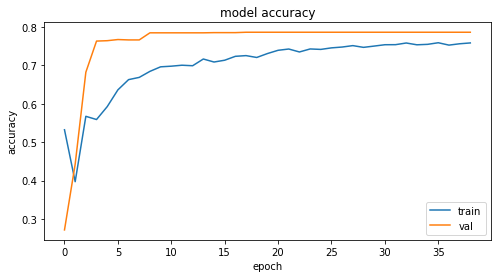

In [94]:
plt.figure(figsize = (8,4))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

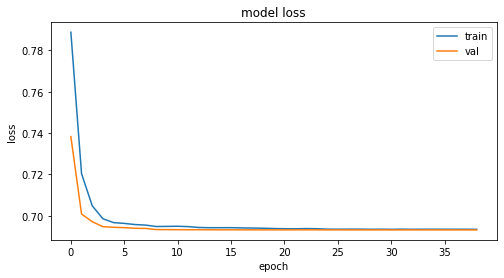

In [100]:
plt.figure(figsize = (8,4))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [96]:
y_predection = network.predict(X_test)
print(y_predection)
prediction = np.argmax(y_predection, axis=1)
print(prediction)

[[0.5016693  0.49833074]
 [0.5016693  0.49833074]
 [0.5016693  0.49833074]
 ...
 [0.5016693  0.49833074]
 [0.5016693  0.49833074]
 [0.5016693  0.49833074]]
[0 0 0 ... 0 0 0]


In [97]:
finalperdict = metrics.accuracy_score(y_test, prediction)
round(finalperdict*100,2)

80.1

In [99]:
network.save_weights('weight1.hdf5')
network.load_weights('weight1.hdf5')